In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
from sklearn import linear_model

In [2]:
df= pd.read_csv("home_prices.csv")
print(df.shape)

(5, 2)


In [3]:
print("Describe: ", df.describe())
print("Columns: ", df.columns)

Describe:                area          price
count     5.000000       5.000000
mean   3280.000000  626000.000000
std     540.370243   74949.983322
min    2600.000000  550000.000000
25%    3000.000000  565000.000000
50%    3200.000000  610000.000000
75%    3600.000000  680000.000000
max    4000.000000  725000.000000
Columns:  Index(['area', 'price'], dtype='object')


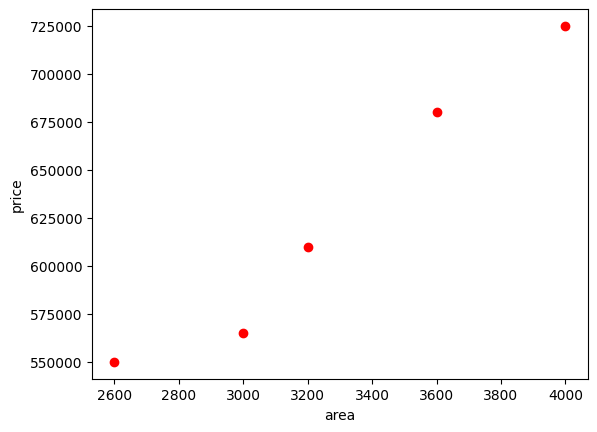

In [20]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df['area'],df.price,color='red')

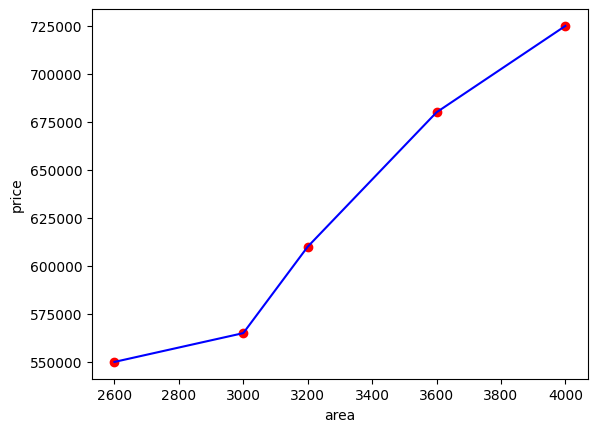

In [21]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df['area'],df.price,color='red')
plt.plot(df.area,df.price,color='blue')

In [35]:
#Create linear regression model 
reg = linear_model.LinearRegression()


# fit funtion used to train (fit) the modek to teh provided data . it finds coefficient of the line

# fit parameter should ALWAYS IN 2D ARRAY FORM
reg.fit(df[['area']],df['price'])

LinearRegression()

In [36]:
reg.predict([[3300]])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [27]:
m=reg.coef_
m

array([135.78767123])

In [28]:
b=reg.intercept_
b

180616.43835616432

In [29]:
3300*m+b

array([628715.75342466])

In [30]:
print('model accuracy is ',reg.score(df[['area']],df['price'])*100)

model accuracy is  95.84301138199486


In [37]:
from sklearn.metrics import r2_score
y_original=df.price
y_predicted=reg.predict(df[['area']])
r_square=r2_score(y_original,y_predicted)
print('model accuracy is ',r_square*100)

model accuracy is  95.84301138199486


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(df['area'],df.price,test_size=.3)
x_train.ndim




1

In [75]:
#since in fit we need 2 d , we reshape 
reg.fit(x_train.values.reshape(-1,1),y_train)
y_pred=reg.predict(x_test.values.reshape(-1,1))
r_square=r2_score(y_test,y_pred)
print('model accuracy is ',r_square*100)

model accuracy is  99.38733511721797


In [85]:
area_df= pd.read_csv("area.csv")

In [86]:
area_df.head()

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [87]:
p=reg.predict(area_df)
p

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 535394.73684211,  589342.10526316,  616315.78947368,
        670263.15789474,  724210.52631579,  252171.05263158,
        520289.47368421, 1263684.21052632,  791644.73684211,
        650032.89473684, 1398552.63157895, 1263684.21052632,
       1128815.78947368, 1263684.21052632,  454473.68421053])

In [88]:
p=reg.predict(area_df)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [79]:
area_df

,area,prices
0,2600,5.353947e+05
1,3000,5.893421e+05
2,3200,6.163158e+05
3,3600,6.702632e+05
4,4000,7.242105e+05
5,500,2.521711e+05
6,2488,5.202895e+05
7,8000,1.263684e+06
8,4500,7.916447e+05
9,3450,6.500329e+05


In [80]:
area_df.to_csv("predicted.csv")

# Storing model

In [89]:
import pickle

In [93]:
#open a file names model_pickel in binaray write mode and storing the model
with open('model_pickle','wb') as file:
    pickle.dump(reg,file)

# Load saved model

In [94]:
#open a file in binary read mode
with open('model_pickle','rb') as file:
    mp=pickle.load(file)